# Project: Wrangling and Analyze Data

<a id='toc'></a>
## Table of Contents

<ul>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <li><a href="#cleaning" >Data Cleaning </a></li>
    <li><a href="#storage"  >Data Storage  </a></li>
    <li><a href="#analysis" >Data Analysis and Visualizations </a></li>
</ul>


In [1]:
#librairies to use
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns 
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
#We use these instructions to make text more readable and easily assess visually
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)


<a id='gathering'></a>
<a href='#toc'>Table of Content</a>
## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
open("image-prediction.tsv","wb").write(response.content)
image_prediction = pd.read_csv("image-prediction.tsv", sep="\t")
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
list_tweets = []
with open('tweet_json.txt', 'r',encoding='utf-8') as openfile:
  for line in openfile:
    data = json.loads(line)
    list_tweets.append({
                "tweet_id": data["id"],
                "retweet_count": data["retweet_count"],
                "favorite_count": data["favorite_count"]                
            })


In [6]:
#list_tweets
tweets= pd.DataFrame(list_tweets)
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id="assessing"></a>
<a href='#toc'>Table of Content</a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Twitter archive Assessment

In this part we will assess the twitter_archive both visually and programmatically


In [7]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
807,771908950375665664,NaN,NaN,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k,NaN,NaN,NaN,https://twitter.com/yahoonews/status/771905568600719360,13,10,None,doggo,None,None,None
2238,668113020489474048,NaN,NaN,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's that one hypocritical gym teacher who made you run laps. Great posture. Cool bench. 6/10 https://t.co/GCJzm3YsfX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668113020489474048/photo/1,6,10,Alfie,None,None,None,None
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,None,None,None,None
2090,670786190031921152,NaN,NaN,2015-11-29 02:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Creg. You offered him a ride to work but you're late and you just missed his exit. 8/10 https://t.co/3r7wznfuoa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670786190031921152/photo/1,8,10,Creg,None,None,None,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372102656000/photo/1,12,10,actually,None,None,None,None


From this visual assessment we can see that:

- the are "None" value in the name column
- not all tweets could be classified as doggo, floofer, pupper or puppo and there are "None" values in these columns
- the source column contain some HTML tags

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

from this assessment we can see that:
- timestamp has a wrong datatype, it should have a datetime type
- there are columns that have so much null values that they are irrelevant to our work (in_reply_to_status_id,
    in_reply_to_user_id, retweeted_status, retweeted_status_user_id, retweeted_status_timestamp)
- we will see with our further assessment if we need to drop them all

Now we will inspect the name column to see if there are another weirds or unappropriates value except "None"

In [9]:
twitter_archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Daisy        7
an           7
Toby         7
Buddy        7
Bella        6
Milo         6
Name: name, dtype: int64

In [109]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
not              2
actually         2
getting          2
by               1
such             1
life             1
infuriating      1
his              1
all              1
space            1
unacceptable     1
incredibly       1
light            1
my               1
old              1
officially       1
this             1
Name: name, dtype: int64

we can see that: 

- these lowercases values don't look like dogs names

In [10]:
#Here we check if there is duplicated values in the twitter archive
twitter_archive[twitter_archive.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

So there is no duplicated values in theses tweets.

Now we will inspect a little more puppo, doggo, floofer and pupper columns.

In [11]:
twitter_archive["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [12]:
twitter_archive["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
twitter_archive["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
twitter_archive["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
#https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/
#Here we want to see the number of twwets that wasn't classified as dogs tweets

twitter_archive[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

From these assessments, we can see that: 
- most of the tweets weren't classified as dogs (1976/2356 have None value)
- most of tweets have either None or a dog class (doggo, floofer, pupper, puppo)

Now we will inspect ratings. from instructions we must have:
- denominator = 10  and numerator > 10


In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

we can see that there is a wide range of values with a maximum of 1776 and some values < 10

In [17]:
print(twitter_archive[twitter_archive["rating_numerator"] == 1776]["text"])

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


In [18]:
twitter_archive.query("rating_numerator == '1'").text

605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446                                           After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
1869                       What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1940                                                        The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
2038         After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
2091        Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not e

In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

To have a better view we will try to extract ratings from text column and compare them with those presents in ratings columns

In [20]:
twitter_archive_assess = twitter_archive.copy()

#as we don't know how the ratings in text are formating, we will retrieve integers and floats(if they exist)

pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

#https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex
twitter_archive_assess["rating"] = twitter_archive_assess.text.str.extract(pattern, expand = True)[0]

#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
twitter_archive_assess[['num', 'denom']] = twitter_archive_assess['rating'].str.split('/', n=1, expand=True)

In [21]:
twitter_archive_assess.rating_numerator = twitter_archive_assess.rating_numerator.astype("str")
twitter_archive_assess.rating_denominator = twitter_archive_assess.rating_denominator.astype("str")

In [22]:
#looking for differences in the original numerator and the new extract

twitter_archive_assess["check_num"] = twitter_archive_assess[["rating_numerator", "num"]].apply(
    lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [23]:
twitter_archive_assess.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [24]:
twitter_archive_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


As we can see, the numerators above have been extract wrongly since it's only their decimal part that has been extract and converted in integers.

Lets see if it's the same with denominators.

In [25]:
#looking for differences in the original numerator and the new extract

twitter_archive_assess["check_denom"] = twitter_archive_assess[["rating_denominator", "denom"]].apply(
    lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [26]:
#problem with integer, maybe also floats?

twitter_archive_assess.query("check_denom == False")[["rating_denominator", "denom","check_denom"]] 

,rating_denominator,denom,check_denom
313,0,00,False


So denominators don't seem to have any problems.

Now we must see how much times there are multiple occurrences of our pattern in a tweet

In [27]:
twitter_archive_assess["count"] = twitter_archive_assess.text.str.count(pattern)
twitter_archive_assess["count"].value_counts()

1    2323
2      32
3       1
Name: count, dtype: int64

In [28]:

twitter_archive_assess[["text", "count"]].query("count != 1")

,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


We can see that:

- these tweets contains retweets
- some ratings are not clear

## Image Prediction Assessment

In this part we will assess the image_prediction dataframe


In [29]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False




We can see that:

- the predicitions are sometimes lowercase, sometimes uppercase
- there is an underscore instead of a whitespace between the words
- there are rows with no prediciton of a dog (neither in p1, p2 nor p3)



In [30]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# here we will look for duplicated 

image_prediction.duplicated().sum()

0

In [32]:
#image_prediction.tweet_id.duplicated().sum()
image_prediction.tweet_id.nunique()

2075

In [33]:
image_prediction.jpg_url.nunique()

2009

In [34]:
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg                                            1
https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg                                            1
https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg                                            1
https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg                                            1
https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg                       

In [35]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

we can see from the above that there are some duplicated/retweeted  images

As we are looking for images with dogs pictures, lets see if there are images that weren't predicted as dogs from algorithms

In [36]:
image_prediction.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


##### We can see that there are 324 images that weren't predicted as dogs.  


## The Tweets assessment

Now we will assess the tweets dataframe

In [37]:
tweets.sample(5)

,tweet_id,retweet_count,favorite_count
91,874296783580663808,4308,26651
460,817536400337801217,3505,13105
362,829374341691346946,10706,38074
995,748324050481647620,867,4078
291,838083903487373313,3582,19183


In [38]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


From our assessment above everything seems fine for this dataset and there is no missing values.

### Quality issues

##### Twitter_archive

1. the source column contains html code

2. the datatype of the timestamp column is object and should be datetime

3. some of the dog names are not correct (None, a, an, the)

4. some of the ratings are not correctly extracted 

5. some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead


##### Image_prediction

6. there is a "_" instead of a whitespace in the predictions

7. the predictions are sometimes uppercase, sometimes lowercase in the image_prediction dataset

8. there are pictures in the image_prediction dataset that are not dogs 

### Tidiness issues
1. the columns doggo, floofer,pupper and puppo should be combined in one column 

2. the three tables share the "tweet_id" column so they should be merged

<a id="cleaning"></a>
<a href='#toc'>Table of Content</a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
twitter_archive_clean  = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweets_clean = tweets.copy()

### Issue #1: HTML tags in source columns

#### Define: Here we will extract text from within HTML tags in the source column

#### Code

In [40]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
twitter_archive_clean.source = twitter_archive_clean.source.str.extract("\>(.*?)\<", expand = True)

#### Test

In [41]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,Twitter for iPhone,This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026190569472/photo/1,11,10,a,None,None,None,None
576,800859414831898624,8.008580e+17,291859009.0,2016-11-22 00:32:18 +0000,Twitter for iPhone,@SkyWilliams doggo simply protecting you from evil that which you cannot see. 11/10 would give extra pets,NaN,NaN,NaN,NaN,11,10,None,doggo,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,Twitter for iPhone,This is Obi. He got camera shy. 12/10 https://t.co/feiPiq7z94,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1",12,10,Obi,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,Twitter for iPhone,This is Craig. That's actually a normal sized fence he's stuck on. H*ckin massive pupper. 11/10 someone help him https://t.co/aAUXzoxaBy,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762094317568/photo/1,11,10,Craig,None,None,pupper,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,Twitter for iPhone,RT @KennyFromDaBlok: 14/10 h*ckin good hats. will wear daily @dog_rates https://t.co/rHLoU5gS30,8.370113e+17,726634734.0,2017-03-01 18:47:10 +0000,"https://twitter.com/KennyFromDaBlok/status/837011344666812416/photo/1,https://twitter.com/KennyFromDaBlok/status/837011344666812416/photo/1",14,10,None,None,None,None,None


### Issue #2: Timestamp data type correction

#### Define :  Here we will correct the data type of the timestamp column

#### Code

In [42]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: Removing wrong names from the name column in the twitter_archive data set

#### Define: We will assign them Nan values

#### Code 

In [110]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name.str.islower()==False]

#### Test

In [111]:
twitter_archive_clean.name.value_counts().head(20)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
Winston     8
Sadie       8
Daisy       7
Toby        7
Bella       6
Bailey      6
Oscar       6
Stanley     6
Koda        6
Jax         6
Bo          6
Louis       5
Rusty       5
Name: name, dtype: int64

### Issue #4: Extract correct numerators values in the twitter_archive dataset

#### Define :  While assessing the dataset, we found that floating numbers got transformed into integers, which lead to loss of information. So we will extract the good values from the "text" column and replace them


#### Code

In [46]:
twitter_archive_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


In [47]:
pattern = "(\d+\.\d+\/\d+)"
twitter_archive_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
340      9.75/10
695      9.75/10
763     11.27/10
1689      9.5/10
1712    11.26/10
Name: 0, dtype: object

In [48]:
#Here we get the right numerator out of the string

num_clean = twitter_archive_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]
num_clean

45       13.5
340      9.75
695      9.75
763     11.27
1689      9.5
1712    11.26
Name: 0, dtype: object

In [49]:
#now get the index of the wrong data so that we can replace them easily after and we change the values type to float 
num_clean_index = num_clean.index
num_clean_values = num_clean.values.astype("float64")

In [50]:
#now we must change the data types of ratings columns and replace the wrong values by the right ones

#here we change the datatypes to float
twitter_archive_clean.rating_numerator   = twitter_archive_clean.rating_numerator.astype("float64")
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype("float64")
#here we replace the data
twitter_archive_clean.loc[num_clean_index, "rating_numerator"] = num_clean_values
twitter_archive_clean.loc[num_clean_index].rating_numerator

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

### Test

In [51]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

In [52]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Issue #5: Removing None values from doggo, floofer. pupper and puppo column

#### Define : We will remove the "None" value from these columns by replacing them with np.nan 

#### Code

In [54]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    twitter_archive_clean[x].replace("None", "", inplace = True)

#### Test 

In [55]:
twitter_archive_clean[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

False    2356
dtype: int64

### Issue #6: Removing "_"  from prediction values in the image_prediction dataset

#### Define:  Here we will replace '_' in the predictions by " "

#### Code

In [56]:
image_prediction_clean.p1.head(10), image_prediction_clean.p2.head(10), image_prediction_clean.p3.head(10)

(0    Welsh_springer_spaniel
 1                   redbone
 2           German_shepherd
 3       Rhodesian_ridgeback
 4        miniature_pinscher
 5      Bernese_mountain_dog
 6                box_turtle
 7                      chow
 8             shopping_cart
 9          miniature_poodle
 Name: p1, dtype: object,
 0                collie
 1    miniature_pinscher
 2              malinois
 3               redbone
 4            Rottweiler
 5      English_springer
 6            mud_turtle
 7       Tibetan_mastiff
 8       shopping_basket
 9              komondor
 Name: p2, dtype: object,
 0              Shetland_sheepdog
 1            Rhodesian_ridgeback
 2                     bloodhound
 3             miniature_pinscher
 4                       Doberman
 5     Greater_Swiss_Mountain_dog
 6                       terrapin
 7                       fur_coat
 8               golden_retriever
 9    soft-coated_wheaten_terrier
 Name: p3, dtype: object)

In [57]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.replace("_"," ")
image_prediction_clean.p2 = image_prediction_clean.p2.str.replace("_"," ")
image_prediction_clean.p3 = image_prediction_clean.p3.str.replace("_"," ")

#### Test

In [58]:
image_prediction_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7: Modify the letters case of predictions columns

#### Define: Here we will change the cases of predictions columns and convert them to lowercase to prevent misunderstandings

#### Code

In [59]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 = image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 = image_prediction_clean.p3.str.lower()

#### Test

In [60]:
image_prediction_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8: Drop rows that doesn't have dogs pictures

#### Define:  Here we will drop the rows that are not predicted as dog

#### Code

In [61]:
image_prediction_clean.drop(image_prediction_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

#### Test

In [62]:
image_prediction_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [63]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Issue #9: Combining doggo, floofer, puppo and pupper 

#### Define:  Here we will combine these columns into a new one

#### Code

In [64]:
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
#concat the columns together

twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'].map(str) + twitter_archive_clean[
    'floofer'].map(str) + twitter_archive_clean['pupper'].map(str) + twitter_archive_clean['puppo'].map(str)

#### Test

In [65]:
twitter_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [66]:
#here we replace the others "" with np.nan
twitter_archive_clean["dog_stage"].replace("", np.nan, inplace = True)

In [67]:
twitter_archive_clean.dog_stage.value_counts() 

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [68]:
#here we count the occurrences of the pattern found in the text column and show the rows with count > 1
twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
565     2
575     2
631     2
705     2
778     2
822     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

In [69]:
# Here we extract dog stages from the text column and store them in a new variable
twitter_archive_clean["dog_stage_ext"] = twitter_archive_clean.text.str.extract(
    r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [70]:
#http://queirozf.com/entries/visualization-options-for-jupyter-notebooks
#show the full text
pd.set_option('display.max_colwidth', None)

#here we show the differences between the originals dog stage and the extract one
twitter_archive_clean[["text","dog_stage", "dog_stage_ext"]].dropna(subset = ["dog_stage_ext"]).query("dog_stage != dog_stage_ext")

,text,dog_stage,dog_stage_ext
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggopupper,doggo
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggopupper,doggo
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo


from the visual above we can see that the difference is about 12 cases:
- 191 puppo class
- 200 floofer class
- 531 two dogs
- 565 two dogs
- 575 pupper
- 705 doggo
- 778 two dogs
- 822 two dogs
- 889 two dogs
- 956 no stage
- 1063 two dogs
- 1113 two dogs

In [71]:
#here we will assign the right stage where there is an error and np.nan where there is two dogs 

twitter_archive_clean.loc[191, "dog_stage"] = "puppo"
twitter_archive_clean.loc[200, "dog_stage"] = "floofer"
twitter_archive_clean.loc[531, "dog_stage"] = np.nan
twitter_archive_clean.loc[565, "dog_stage"] = np.nan
twitter_archive_clean.loc[575, "dog_stage"] = "pupper"
twitter_archive_clean.loc[705, "dog_stage"] = "doggo"
twitter_archive_clean.loc[778, "dog_stage"] = np.nan
twitter_archive_clean.loc[822, "dog_stage"] = np.nan
twitter_archive_clean.loc[889, "dog_stage"] = np.nan
twitter_archive_clean.loc[956, "dog_stage"] = np.nan
twitter_archive_clean.loc[1063, "dog_stage"] = np.nan
twitter_archive_clean.loc[1113, "dog_stage"] = np.nan

In [72]:
#find the differences of the extract - worked
twitter_archive_clean[["text","dog_stage", "dog_stage_ext"]].dropna(subset = ["dog_stage_ext"]).query("dog_stage != dog_stage_ext")

,text,dog_stage,dog_stage_ext
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,doggo
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


In [73]:
twitter_archive_clean.dog_stage.value_counts()

pupper         246
doggo           84
puppo           30
floofer         10
doggopupper      2
Name: dog_stage, dtype: int64

In [74]:
#here we check if there is a clear stage for tweets that have "doggopupper" values in the text column 
twitter_archive_clean[twitter_archive_clean.dog_stage == "doggopupper"][['text']]

,text
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u"


In [75]:
#we have seen that there is no clear stage for these tweets so we will drop them
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != "doggopupper"]

In [76]:
twitter_archive_clean.dog_stage.value_counts()

pupper     246
doggo       84
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [77]:
#drop the columns we don't need anymore 
twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_stage_ext"], inplace = True, axis = 1)

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   float64         

#### Note:  As we only need originals tweets, here we will filter our data to delete the retweeted ones

In [79]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].isnull()]

In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2173 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2173 non-null   datetime64[ns, UTC]
 4   source                      2173 non-null   object             
 5   text                        2173 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2115 non-null   object             
 10  rating_numerator            2173 non-null   float64         

In [81]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2095 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2095 non-null   datetime64[ns, UTC]
 4   source                      2095 non-null   object             
 5   text                        2095 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2092 non-null   object             
 10  rating_numerator            2095 non-null   float64         

In [83]:
#here we drop unnecessary columns
twitter_archive_clean = twitter_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                       'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2095 non-null   int64              
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   float64            
 6   rating_denominator  2095 non-null   float64            
 7   name                1423 non-null   object             
 8   dog_stage           329 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 163.7+ KB


### Issue #10: Combining all the three datasets

#### Define:  Our datasets shared the "tweet_id" column so we should merge them to have only one dataset

#### Code

In [85]:
master_df = twitter_archive_clean.merge(tweets_clean, on="tweet_id", how="outer")
master_df = master_df.merge(image_prediction_clean, on="tweet_id", how="outer")

### Test

In [86]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2355 non-null   int64              
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   float64            
 6   rating_denominator  2095 non-null   float64            
 7   name                1423 non-null   object             
 8   dog_stage           329 non-null    object             
 9   retweet_count       2354 non-null   float64            
 10  favorite_count      2354 non-null   float64            
 11  jpg_url             1751 non-null   object             
 12  img_num             1751 non-null 

<a id='storage'></a>
<a href='#toc'>Table of Content</a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [87]:
master_df.to_csv('twitter_master_archive.csv', index=False)

<a id='analysis'></a>
<a href='#toc'>Table of Content</a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [88]:
new_df = pd.read_csv('twitter_master_archive.csv')
new_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,8853.0,39467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2355 non-null   int64  
 1   timestamp           2095 non-null   object 
 2   source              2095 non-null   object 
 3   text                2095 non-null   object 
 4   expanded_urls       2092 non-null   object 
 5   rating_numerator    2095 non-null   float64
 6   rating_denominator  2095 non-null   float64
 7   name                1423 non-null   object 
 8   dog_stage           329 non-null    object 
 9   retweet_count       2354 non-null   float64
 10  favorite_count      2354 non-null   float64
 11  jpg_url             1751 non-null   object 
 12  img_num             1751 non-null   float64
 13  p1                  1751 non-null   object 
 14  p1_conf             1751 non-null   float64
 15  p1_dog              1751 non-null   object 
 16  p2    

### 1. What is the most predicted dog type?

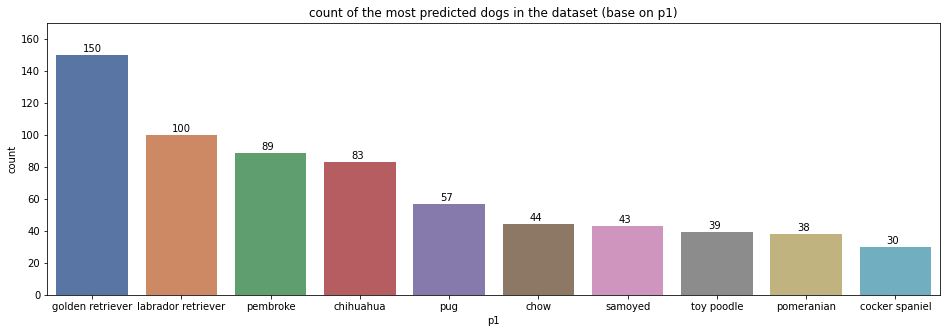

In [107]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

#here we only focus on the p1 column as it must contain the most precised predictions

fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "p1", data = new_df, order=new_df.p1.value_counts().iloc[:10].index, palette = "deep")
ax.set_title("count of the most predicted dogs in the dataset (base on p1)");
ax.set_ylim(0, 170)

#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

<AxesSubplot:>

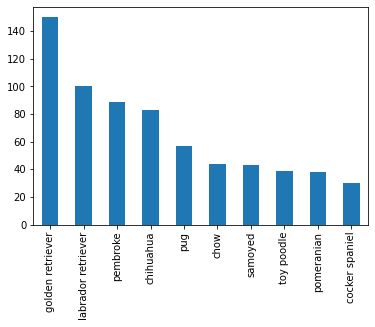

In [91]:
new_df['p1'].value_counts().head(10).plot(kind = 'bar')

<AxesSubplot:title={'center':'second most predicted dogs in the dataset (p2)'}>

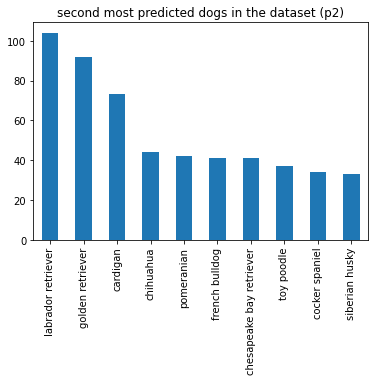

In [92]:
new_df['p2'].value_counts().head(10).plot(kind = 'bar', title="second most predicted dogs in the dataset (p2)")

<AxesSubplot:title={'center':'Third most predicted dogs in the dataset (p3)'}>

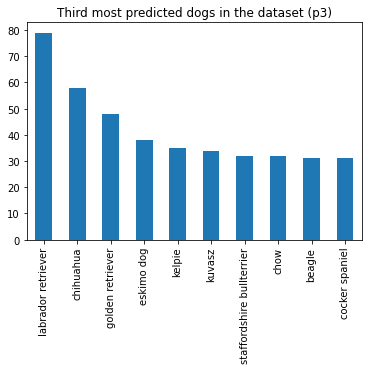

In [93]:
new_df['p3'].value_counts().head(10).plot(kind = 'bar',title="Third most predicted dogs in the dataset (p3)")

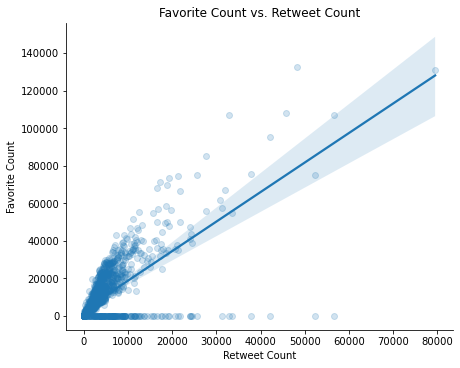

In [94]:
# Here we are looking for an eventual relationship between the number of retweets and the number of favorites 
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=new_df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

In [95]:
df_time = new_df.copy()

In [96]:
df_time.timestamp = pd.to_datetime(df_time.timestamp)

In [97]:
df_time["year"] = df_time["timestamp"].apply(lambda x: x.year)

In [98]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2355 non-null   int64              
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   float64            
 6   rating_denominator  2095 non-null   float64            
 7   name                1423 non-null   object             
 8   dog_stage           329 non-null    object             
 9   retweet_count       2354 non-null   float64            
 10  favorite_count      2354 non-null   float64            
 11  jpg_url             1751 non-null   object             
 12  img_num             1751 non-null 

##### Here we are looking the evolution of favorite and retweet counts over time

In [99]:
df_time_groupby = df_time.groupby("year", as_index = False).sum()

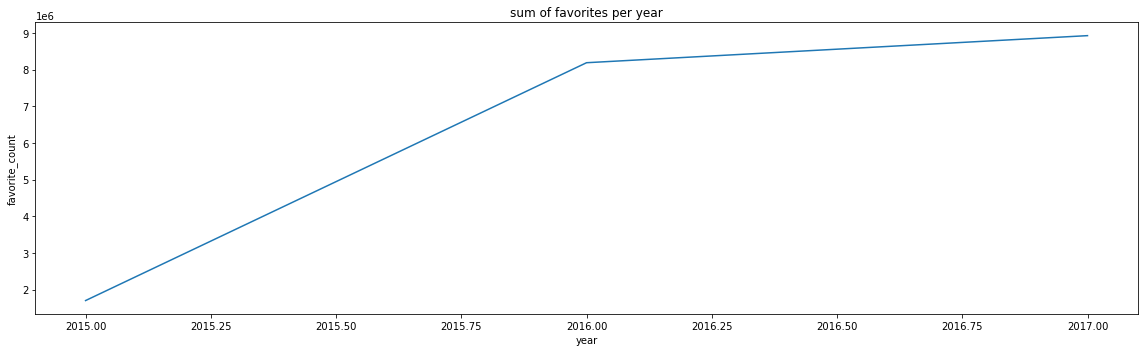

In [100]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.lineplot(x = "year", y = "favorite_count", data = df_time_groupby, palette = "deep")
ax.set_title("sum of favorites per year");
plt.tight_layout()

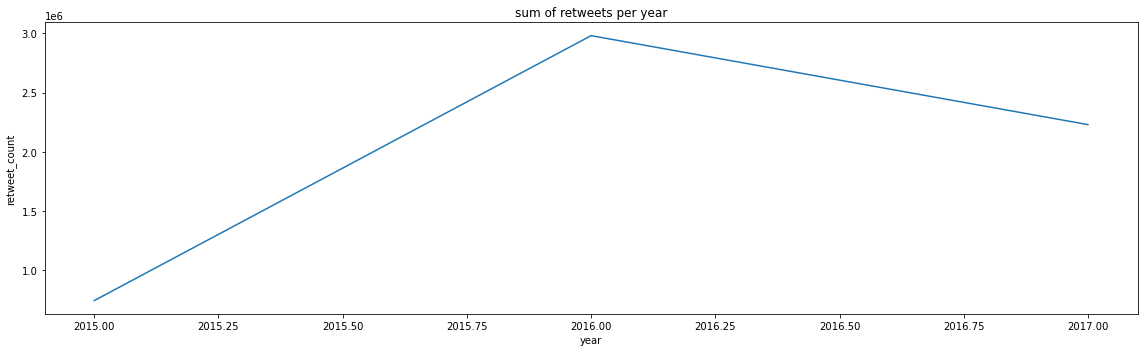

In [101]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.lineplot(x = "year", y = "retweet_count", data = df_time_groupby, palette = "deep")
ax.set_title("sum of retweets per year");
plt.tight_layout()

#### It appears that the number of favorite count keep increasing over time when the number of retweets seems to declining.

### 2. What is the most dog's name used?

<AxesSubplot:title={'center':'Most Popular Dogs names'}>

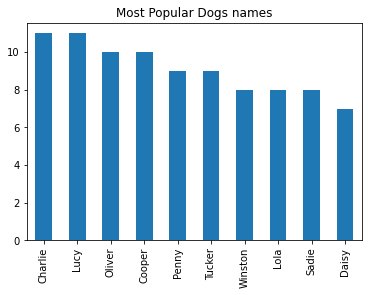

In [102]:
new_df['name'].value_counts().head(10).plot(kind = 'bar', title="Most Popular Dogs names")

### 3. What is the most favorite dog's type?

In [103]:
new_df[["retweet_count", "favorite_count", "p1"]].groupby("p1", as_index = False).sum().sort_values("retweet_count", ascending = False).head(10)

,p1,retweet_count,favorite_count
79,golden retriever,581170.0,1696627.0
111,labrador retriever,427343.0,1123850.0
47,chihuahua,304218.0,676441.0
140,pembroke,280367.0,994755.0
155,samoyed,212438.0,542991.0
48,chow,130080.0,404241.0
50,cocker spaniel,122939.0,315825.0
74,french bulldog,121782.0,465738.0
144,pug,112830.0,320223.0
143,pomeranian,106518.0,299114.0


In [104]:
new_df[["retweet_count", "favorite_count", "p1"]].sort_values("favorite_count", ascending = False).head(5)

,retweet_count,favorite_count,p1
325,48265.0,132810.0,lakeland terrier
823,79515.0,131075.0,labrador retriever
60,45849.0,107956.0,english springer
418,56625.0,107015.0,chihuahua
115,32883.0,106827.0,french bulldog


Text(0.5, 1.0, 'Most favorite dogs')

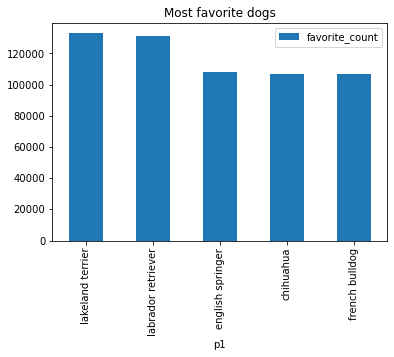

In [105]:
new_df[["retweet_count", "favorite_count", "p1"]].sort_values(
    "favorite_count", ascending = False).head(5).plot(x='p1',y='favorite_count', kind="bar")
plt.title("Most favorite dogs")

### Insights:

##### 1.  The most dog type predicted is Golden retriever.

##### 2.  The most names used to identify dogs are Lucy and Charlie. 

##### 3. The most favorite dogs type is the Lakeland Terrier

#### Thanks for your Time.